In [3]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np
import missingno
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# read_csv() 함수로 df 생성
df = pd.read_csv('C:/code/auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


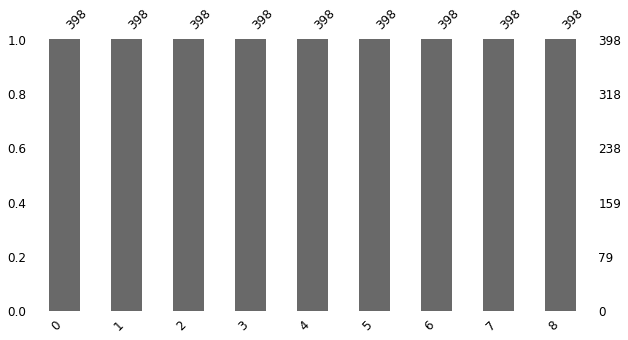

In [5]:
missingno.bar(df, figsize=(10,5), fontsize=12);

In [7]:
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [10]:
# pd.cut 으로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,보통출력
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,저출력


In [8]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))

    저출력  보통출력  고출력
0     0     1    0
1     0     1    0
2     0     1    0
3     0     1    0
4     0     1    0
5     0     0    1
6     0     0    1
7     0     0    1
8     0     0    1
9     0     0    1
10    0     0    1
11    0     1    0
12    0     1    0
13    0     0    1
14    1     0    0


In [11]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,보통출력
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,저출력


In [15]:
df.horsepower.max()

230.0

In [16]:
abs(df.horsepower.max())#abs : absolute : 절댓값

230.0